<img title="GitHub Octocat" src='./img/Octocat.jpg' style='height: 60px; padding-right: 15px' alt="Octocat" align="left"> This notebook is part of a GitHub repository: https://github.com/pessini/moby-bikes 
<br>MIT Licensed
<br>Author: Leandro Pessini

# <p style="font-size:100%; text-align:left; color:#444444;">Exploratory Data Analysis (EDA)</p>

# <p style="font-size:100%; text-align:left; color:#444444;">Table of Contents:</p>
* [1. Datasets](#1)
  * [1.1 Rentals Data - Moby Bikes](#1.1)
  * [1.2 Weather Data - Met Éireann](#1.2)
* [2. Preprocessing & Feature Engineering](#2)
  * [2.1 Target variable distribution](#2.1)
  * [2.2 Missing values](#2.2)
  * [2.3 Exploratory Analysis](#2.3)
  * [2.4 Features Importance](#2.4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA libraries
from pandas_profiling import ProfileReport
from dataprep.eda import create_report
import sweetviz as sv

%matplotlib inline
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
from platform import python_version
print('Python version:', python_version())

Python version: 3.9.6


In [3]:
%reload_ext watermark
%watermark -a "Leandro Pessini" --iversions

Author: Leandro Pessini

seaborn   : 0.11.1
sweetviz  : 2.1.3
sys       : 3.9.6 | packaged by conda-forge | (default, Jul 11 2021, 03:36:15) 
[Clang 11.1.0 ]
matplotlib: 3.4.2
pandas    : 1.3.0
numpy     : 1.21.1



In [4]:
hourly_data = pd.read_csv('../data/processed/hourly_data.csv')
hourly_rentals = pd.read_csv('../data/processed/hourly_rentals.csv')
all_data = pd.read_csv('../data/processed/all_data.csv')
rentals = pd.read_csv('../data/interim/new_features_rentals.csv')
hourly_data.head()

rain  temp  rhum  wdsp        date  hour  day  month  year  holiday  \
0   0.0   0.1    98     4  2021-03-01     0    1      3  2021    False   
1   0.0  -1.1    98     3  2021-03-01     1    1      3  2021    False   
2   0.0  -1.2    98     4  2021-03-01     2    1      3  2021    False   
3   0.0  -0.9   100     5  2021-03-01     3    1      3  2021    False   
4   0.0   0.0   100     6  2021-03-01     4    1      3  2021    False   

   dayofweek_n dayofweek  working_day  season   peak timesofday rain_type  \
0            0    Monday         True  Winter  False      Night   no rain   
1            0    Monday         True  Winter  False      Night   no rain   
2            0    Monday         True  Winter  False      Night   no rain   
3            0    Monday         True  Winter  False      Night   no rain   
4            0    Monday         True  Winter  False      Night   no rain   

   count  
0      0  
1      0  
2      1  
3      0  
4      0

## Dataprep Report

In [5]:
hourly_data_report = create_report(hourly_data, title='Hourly Data Report', progress=False)
hourly_data_report.save('../reports/dataprep/hourly_data_report')

Report has been saved to ../reports/dataprep/hourly_data_report.html!


In [6]:
hourly_rentals_report = create_report(hourly_rentals, title='Hourly Data Report (Only Rentals)', progress=False)
hourly_rentals_report.save('../reports/dataprep/hourly_rentals_report')

Report has been saved to ../reports/dataprep/hourly_rentals_report.html!


## Pandas Profiling Report

In [7]:
profile = ProfileReport(hourly_data, title='Hourly Data', html={'style':{'full_width':True}})
profile.to_file(output_file='../reports/pandas-profiling/hourly_data_report.html')

profile = ProfileReport(hourly_rentals, title='Hourly Data Report (Only Rentals)', html={'style':{'full_width':True}})
profile.to_file(output_file='../reports/pandas-profiling/hourly_rentals_report.html')
# to_notebook_iframe() will print in the jupyter notebook's cell
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
cat_vars_dict = {'holiday': 'category', 'dayofweek': 'category', 'working_day': 'category', 
            'season': 'category', 'peak': 'category', 'timesofday': 'category', 'rain_type': 'category'}

hourly_data = hourly_data.astype(cat_vars_dict)
hourly_rentals = hourly_rentals.astype(cat_vars_dict)

## SweetViz Report

In [9]:
hourlydata_sweetviz_report = sv.analyze(hourly_data, target_feat='count')
hourlydata_sweetviz_report.show_html('../reports/sweetviz/hourly_data_report.html')

hourlyrentals_sweetviz_report = sv.analyze(hourly_rentals, target_feat='count')
hourlyrentals_sweetviz_report.show_html('../reports/sweetviz/hourly_rentals_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/sweetviz/hourly_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/sweetviz/hourly_rentals_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rain         8760 non-null   float64 
 1   temp         8760 non-null   float64 
 2   rhum         8760 non-null   int64   
 3   wdsp         8760 non-null   int64   
 4   date         8760 non-null   object  
 5   hour         8760 non-null   int64   
 6   day          8760 non-null   int64   
 7   month        8760 non-null   int64   
 8   year         8760 non-null   int64   
 9   holiday      8760 non-null   category
 10  dayofweek_n  8760 non-null   int64   
 11  dayofweek    8760 non-null   category
 12  working_day  8760 non-null   category
 13  season       8760 non-null   category
 14  peak         8760 non-null   category
 15  timesofday   8760 non-null   category
 16  rain_type    8760 non-null   category
 17  count        8760 non-null   int64   
dtypes: category(7), float64(2), 

In [11]:
hourly_data[cat_vars_dict].describe()

holiday dayofweek working_day  season   peak timesofday rain_type
count     8760      8760        8760    8760   8760       8760      8760
unique       2         7           2       4      2          4         5
top      False    Monday        True  Summer  False      Night   no rain
freq      8568      1272        6120    2256   6210       2920      7862

## Hourly Rentals (Holiday)

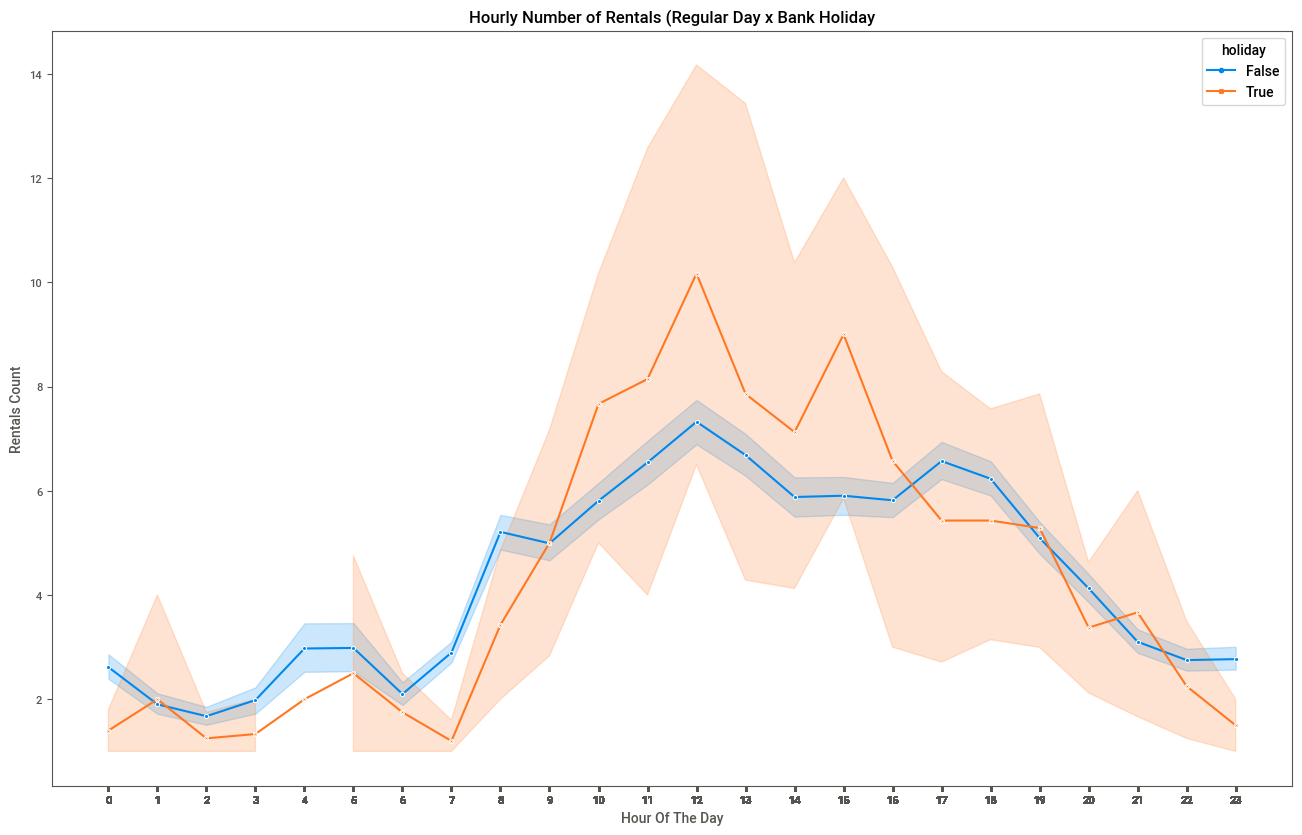

In [12]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.lineplot(x=hourly_rentals["hour"], y=hourly_rentals["count"], style=hourly_rentals["holiday"],
             hue=hourly_rentals["holiday"], ax=ax, markers=True, dashes=False)
ax.set(xlabel='Hour Of The Day', ylabel='Rentals Count', 
       title="Hourly Number of Rentals (Regular Day x Bank Holiday")
plt.xticks(hourly_rentals["hour"])
plt.show()

## Hourly Rentals by Season

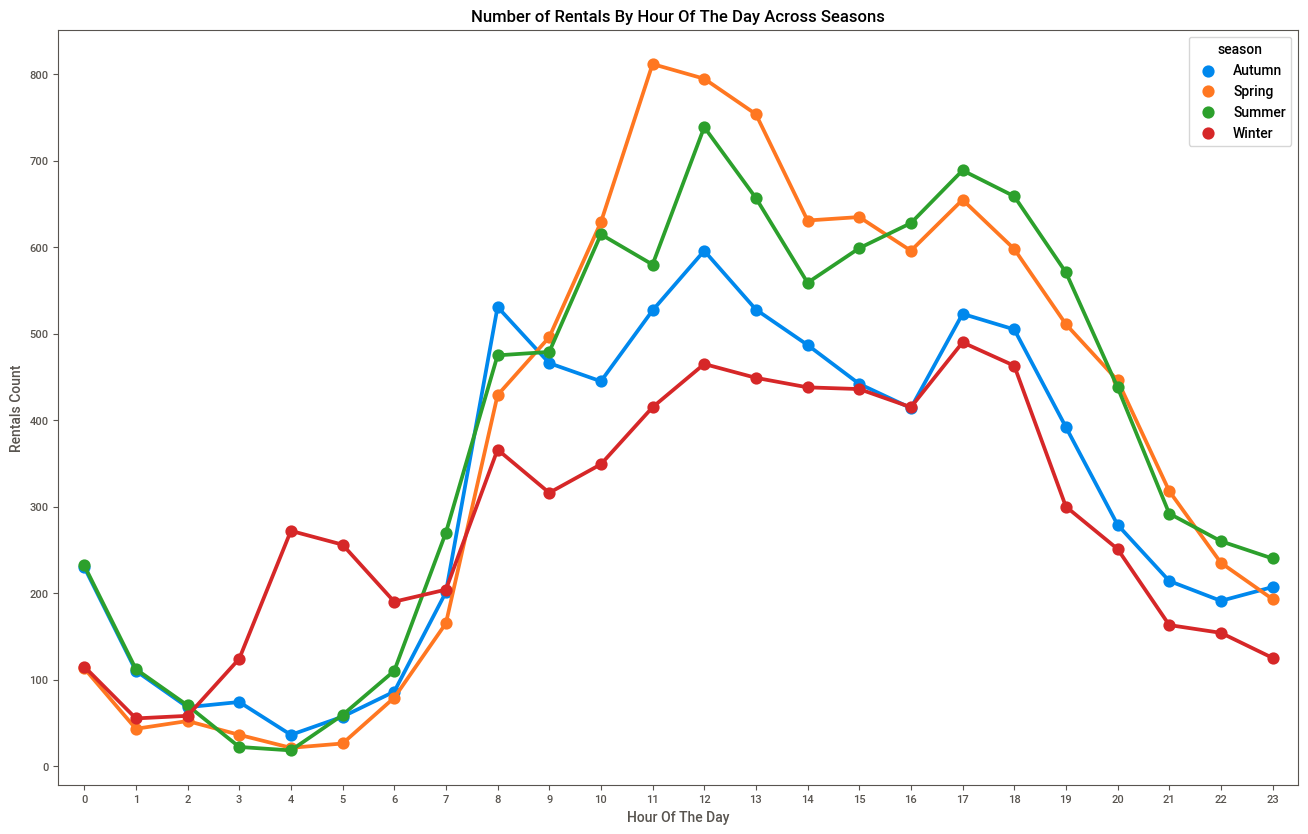

In [13]:
season_freq = hourly_rentals.groupby(['season', 'hour'])['count'].agg('sum').reset_index(name='count')
fig, ax = plt.subplots(figsize=(16, 10))
sns.pointplot(x=season_freq["hour"], y=season_freq["count"], hue=season_freq["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Rentals Count', title="Number of Rentals By Hour Of The Day Across Seasons")
plt.show()

### Rentals by Season

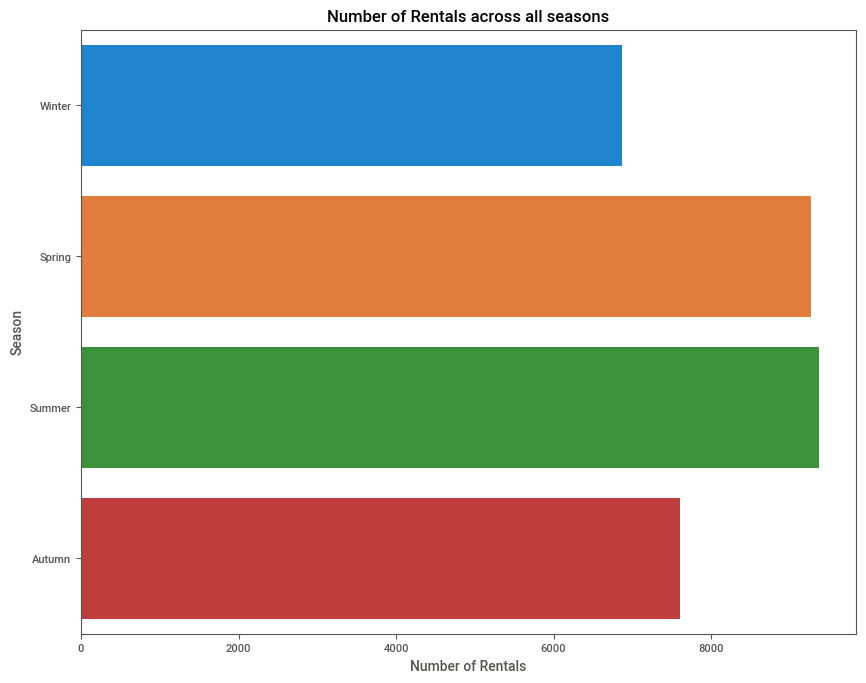

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=season_freq.groupby('season')['count'].sum().reset_index(), x='count', y='season', order=['Winter','Spring','Summer','Autumn'], ci=None)
ax.set(xlabel='Number of Rentals', ylabel='Season', title='Number of Rentals across all seasons')
plt.show()

## Hourly Rentals by Days of the Week

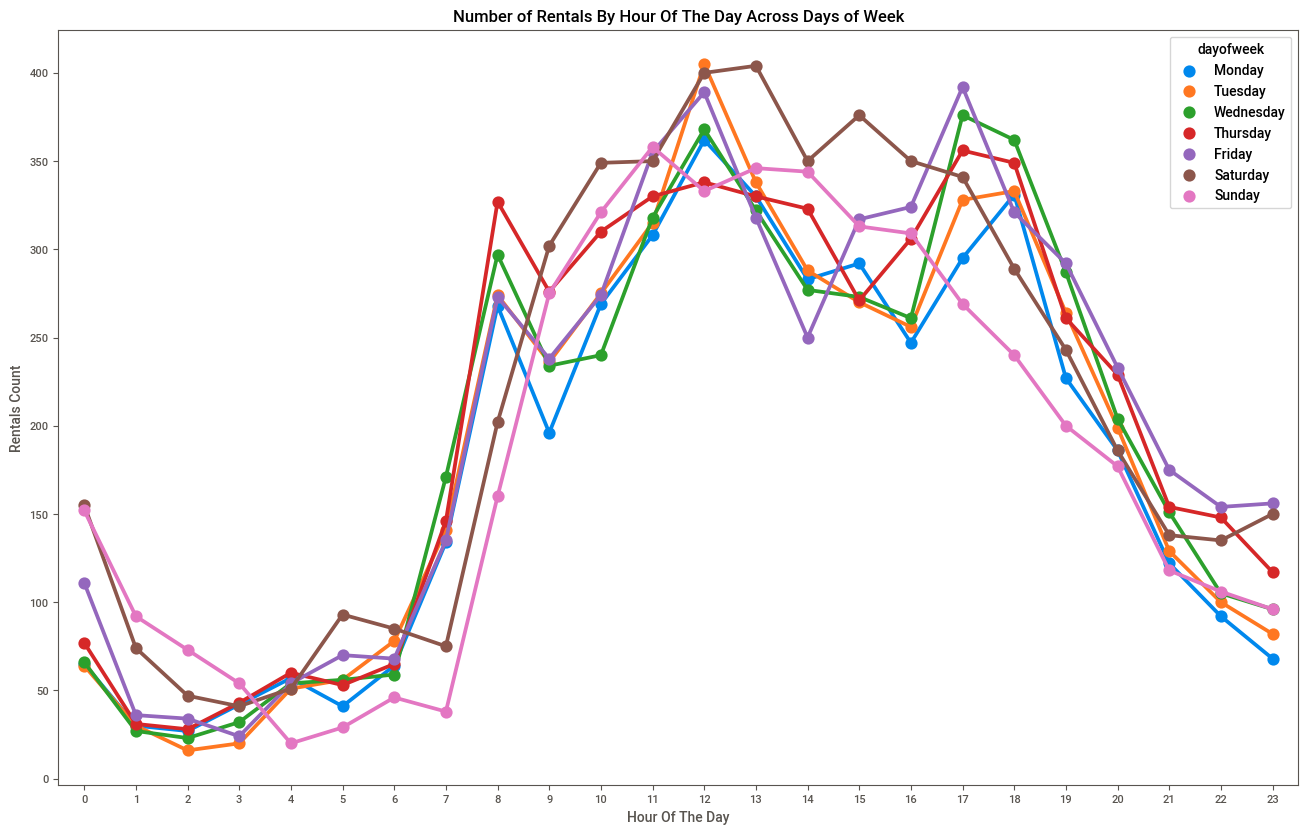

In [15]:
day_of_week = hourly_rentals.groupby(['dayofweek', 'hour'])['count'].agg('sum').reset_index(name='count')
fig, ax = plt.subplots(figsize=(16, 10))
sns.pointplot(x=day_of_week["hour"], 
              y=day_of_week["count"], 
              hue=day_of_week["dayofweek"], 
              ax=ax,
              hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set(xlabel='Hour Of The Day', ylabel='Rentals Count', title="Number of Rentals By Hour Of The Day Across Days of Week")
plt.show()

### Rentals by Days of the Week

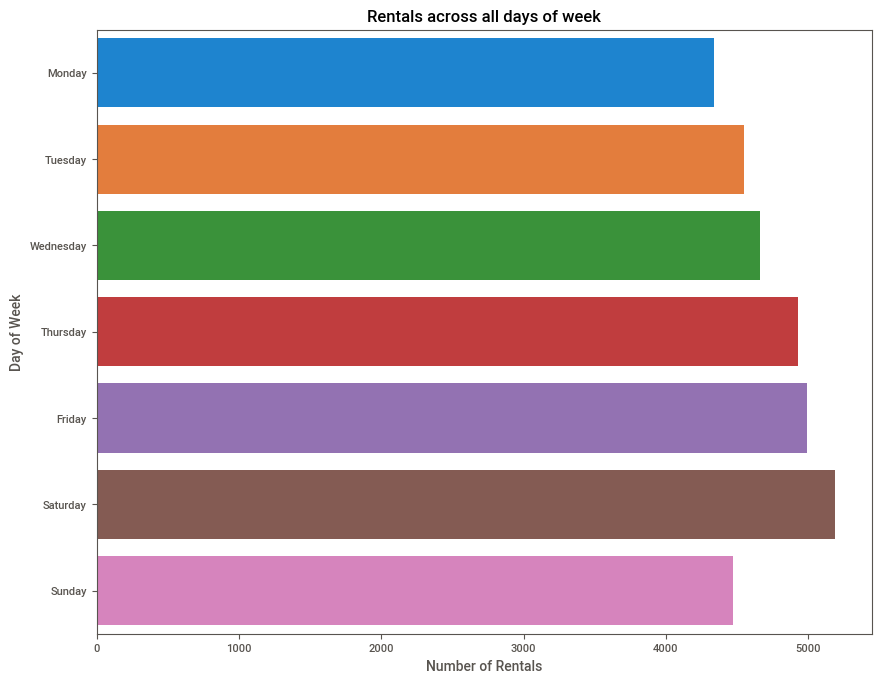

In [16]:
day_of_week = hourly_rentals.groupby('dayofweek')['count'].agg('sum').reset_index(name='count')
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=day_of_week, x='count', y='dayofweek', ci=None, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set(xlabel='Number of Rentals', ylabel='Day of Week', title='Rentals across all days of week')
plt.show()

## Rental by Peak Hours

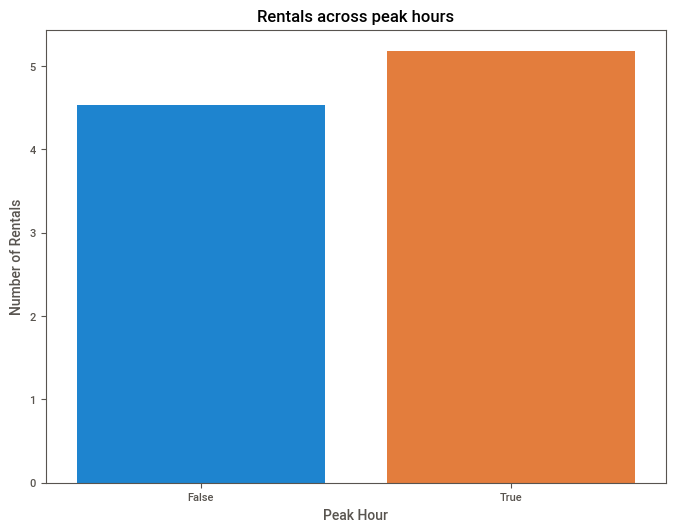

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=hourly_rentals, x='peak', y='count', ci=None)
ax.set(xlabel='Peak Hour', ylabel='Number of Rentals', title='Rentals across peak hours')
plt.show()

## Rentals across Times of Day

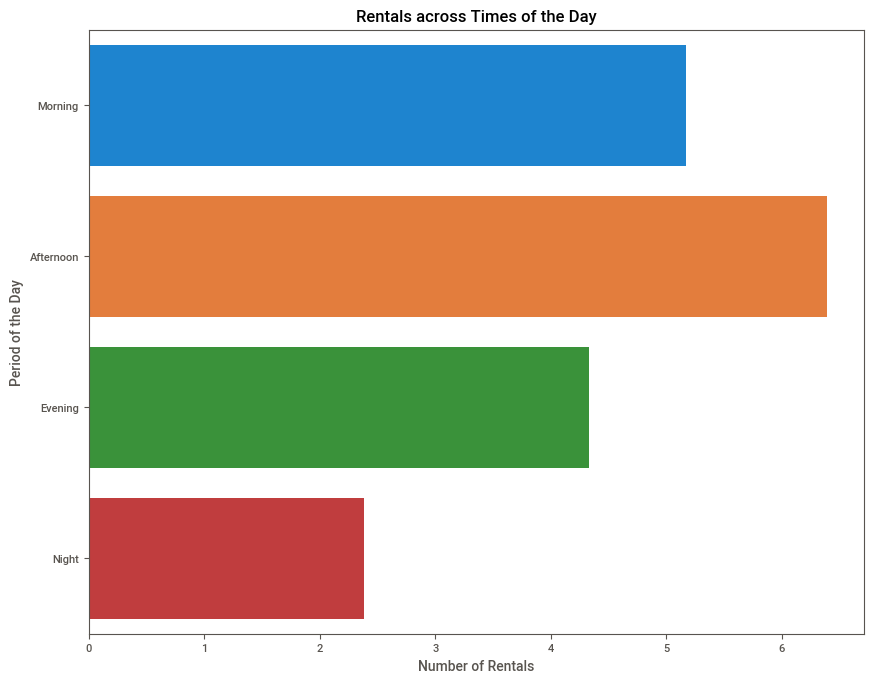

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=hourly_rentals, x='count', y='timesofday', ci=None, order=['Morning','Afternoon','Evening','Night'])
ax.set(xlabel='Number of Rentals', ylabel='Period of the Day', title='Rentals across Times of the Day')
plt.show()

## Monthly Data

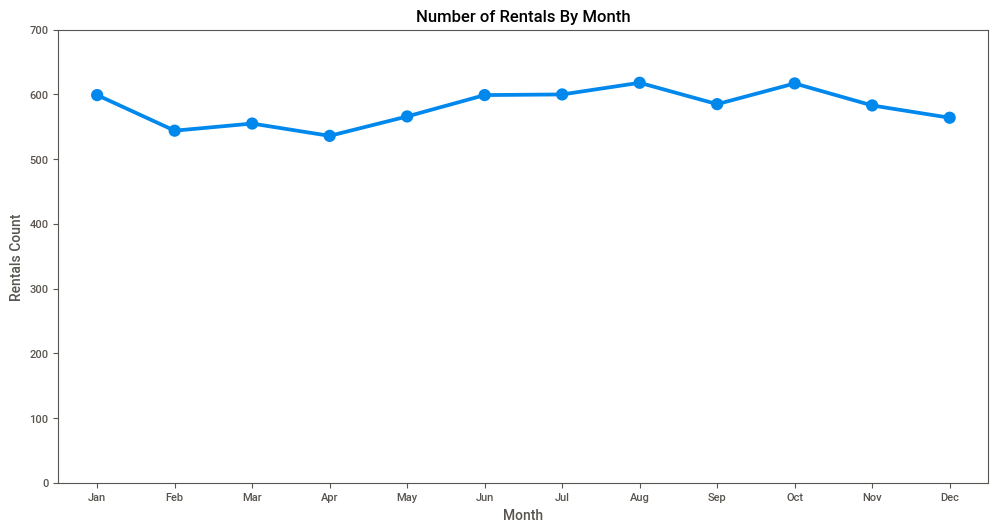

In [19]:
monthly_data = hourly_rentals.groupby('month')['count'].agg('count').reset_index(name='count')
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
monthly_data['monthly_data_str'] = monthly_data['month'].map(lambda d : month_map[d])
fig, ax = plt.subplots(figsize=(12, 6))
sns.pointplot(x=monthly_data["monthly_data_str"], 
              y=monthly_data["count"],
              ax=ax)
ax.set(xlabel='Month', ylabel='Rentals Count', title="Number of Rentals By Month")
ax.set(ylim=(0,700))
plt.show()

## Battery distribution

In [20]:
battery_dist = all_data.copy()

def group_battery_status(df):

    bins= [0,30,50,80,100]
    labels = ['< 30%','30% - 50%','50% - 80%','> 80%']
    battery_dist['battery_status'] = pd.cut(battery_dist['start_battery'], bins=bins, labels=labels, right=False)

    s = battery_dist.battery_status
    counts = s.value_counts()
    percent = s.value_counts(normalize=True)
    percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    return pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}, labels)

group_battery_status(battery_dist)

counts       per per100
< 30%        2509  0.076862   7.7%
30% - 50%    5767  0.176669  17.7%
50% - 80%   14290  0.437766  43.8%
> 80%       10077  0.308703  30.9%

### Initial battery density

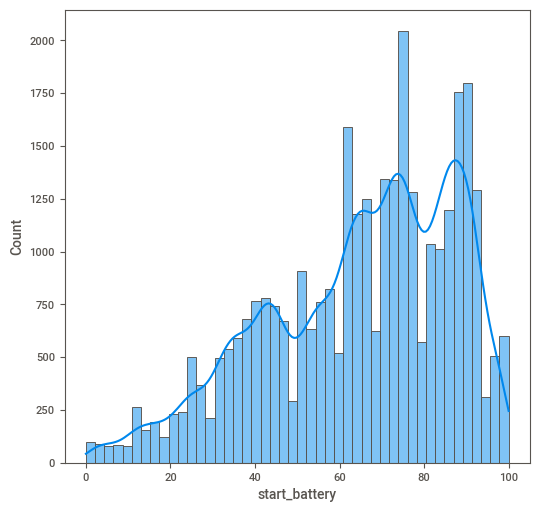

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(data=rentals, x='start_battery', kde=True)
plt.show()

In [22]:
print(f"Mean of rentals duration: {round(all_data['duration'].mean(), 2)} minutes")

Mean of rentals duration: 958.96 minutes


## BoxPlot analysis

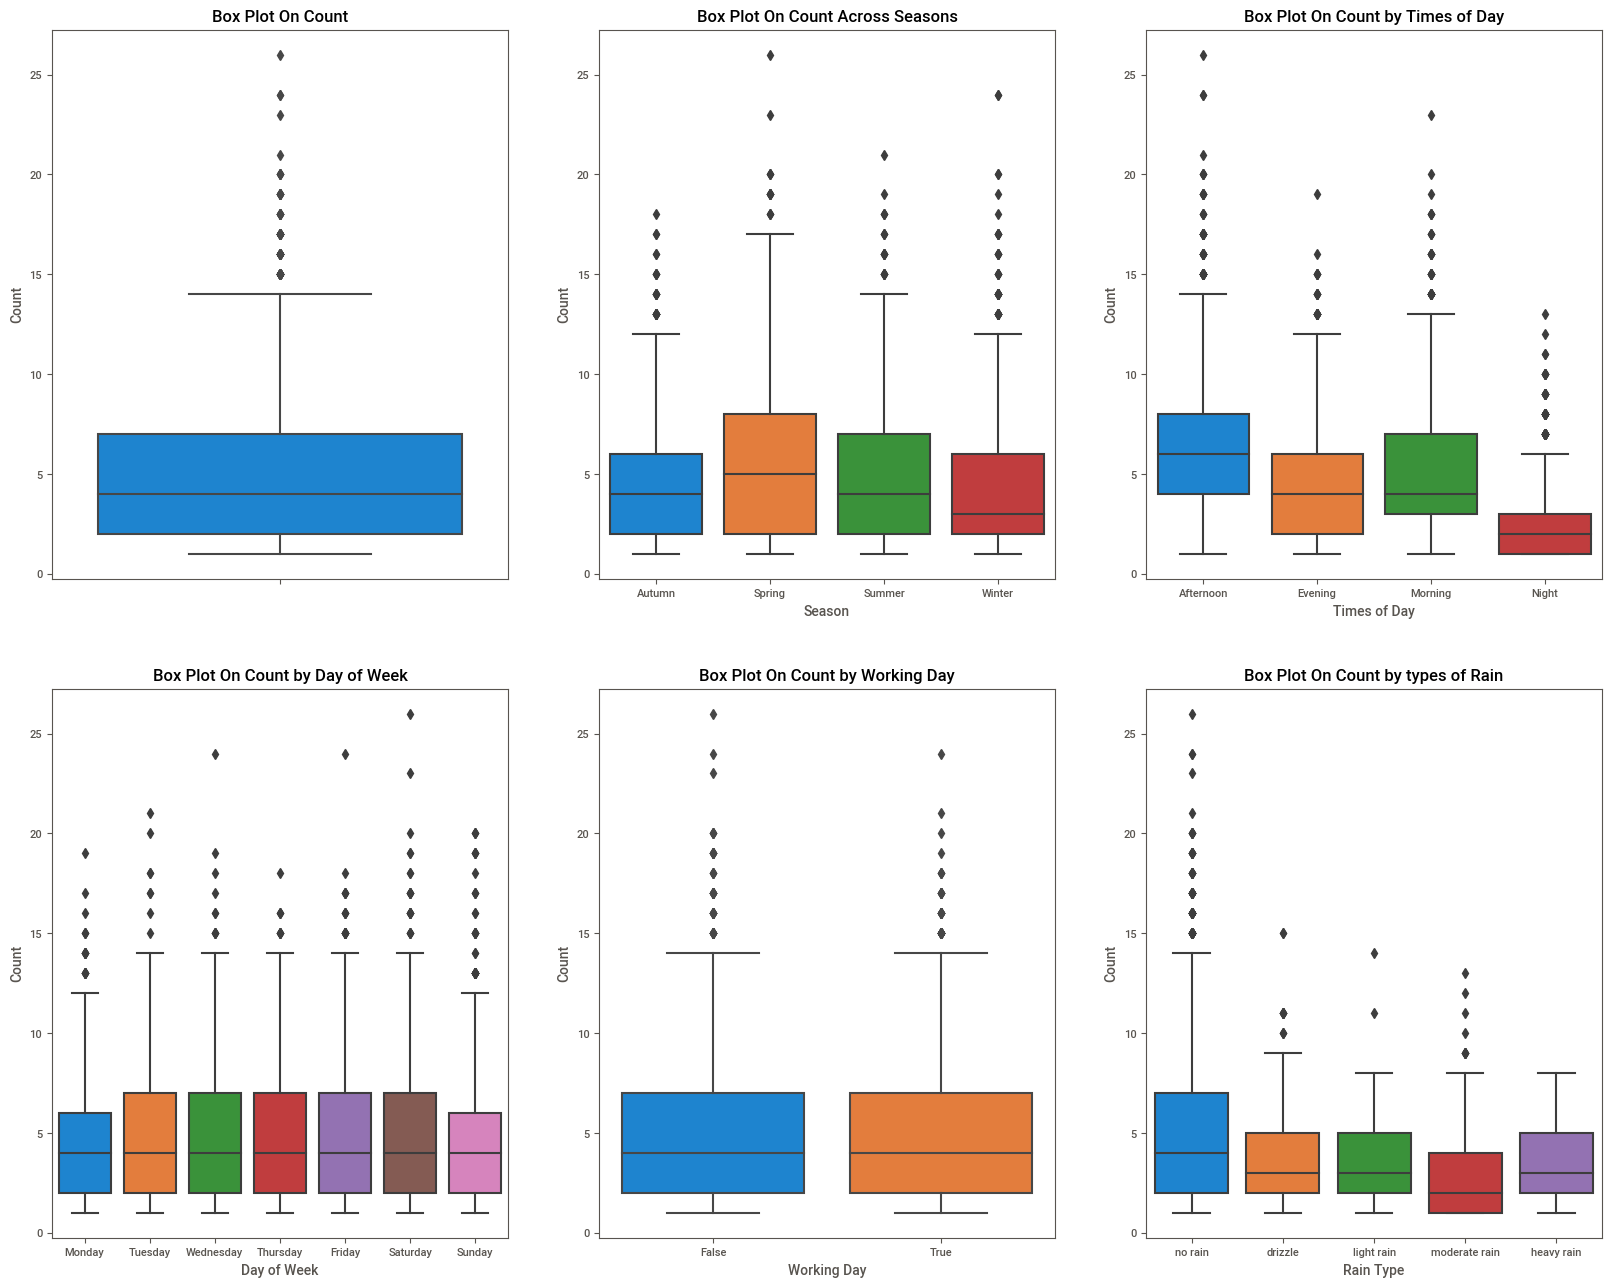

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 16)
sns.boxplot(data=hourly_rentals,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=hourly_rentals,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=hourly_rentals,y="count",x="dayofweek",orient="v",ax=axes[1][0], 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.boxplot(data=hourly_rentals,y="count",x="working_day",orient="v",ax=axes[1][1])
sns.boxplot(data=hourly_rentals,y="count",x="timesofday",orient="v",ax=axes[0][2])
sns.boxplot(data=hourly_rentals,y="count",x="rain_type",orient="v",ax=axes[1][2], 
            order=['no rain', 'drizzle', 'light rain', 'moderate rain', 'heavy rain'])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Seasons")
axes[1][0].set(xlabel='Day of Week', ylabel='Count',title="Box Plot On Count by Day of Week")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count by Working Day")
axes[0][2].set(xlabel='Times of Day', ylabel='Count',title="Box Plot On Count by Times of Day")
axes[1][2].set(xlabel='Rain Type', ylabel='Count',title="Box Plot On Count by types of Rain")

plt.show()

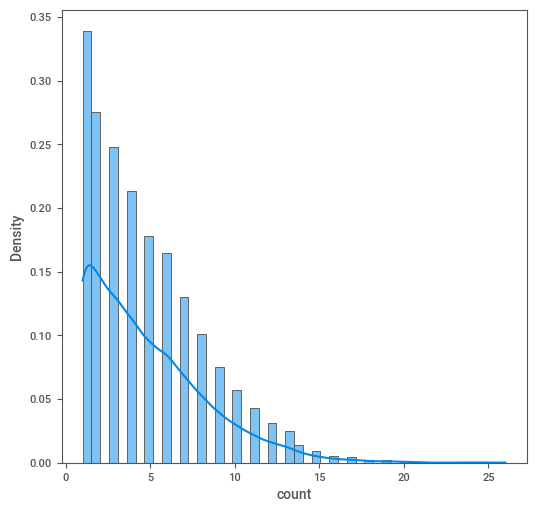

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(data=hourly_rentals, x='count', stat='density', kde=True)
plt.show()

## Kruskal-Wallis H-test on categorical features

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

>*count* feature does not have normal distribution, using non-parametric Kruskal-Wallis H-test instead

In [25]:
# Defining a function to find the statistical relationship with all the categorical variables
def kruskal_test_categorical_features(df, target, cat_vars):
    from scipy.stats import kruskal

    # Creating an empty list of final selected predictors
    selected_predictors=[]
    
    print('##### Kruskal-Wallis H-test Results ##### \n')
    for predictor in cat_vars:
        cat_grouplist=df.groupby(predictor)[target].apply(list)
        kruskal_res = kruskal(*cat_grouplist) #  Kruskal-Wallis H-test
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (kruskal_res[1] < 0.05):
            print(predictor, 'is correlated with', target, '| p-value:', kruskal_res[1])
            selected_predictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', target, '| p-value:', kruskal_res[1])
    
    return(selected_predictors)

In [26]:
# Calling the function to check which categorical variables are correlated with target
cat_vars=['season', 'hour', 'holiday', 'working_day', 'peak', 'timesofday', 'rain_type']
kruskal_test_categorical_features(df=hourly_rentals, target='count', cat_vars=cat_vars)

##### Kruskal-Wallis H-test Results ##### 

season is correlated with count | p-value: 8.63495056716637e-31
hour is correlated with count | p-value: 0.0
holiday is NOT correlated with count | p-value: 0.41942955527875236
working_day is NOT correlated with count | p-value: 0.15009923596080033
peak is correlated with count | p-value: 1.0653072805746697e-28
timesofday is correlated with count | p-value: 0.0
rain_type is correlated with count | p-value: 2.880235646944005e-24


['season', 'hour', 'peak', 'timesofday', 'rain_type']

## Correlation Matrix

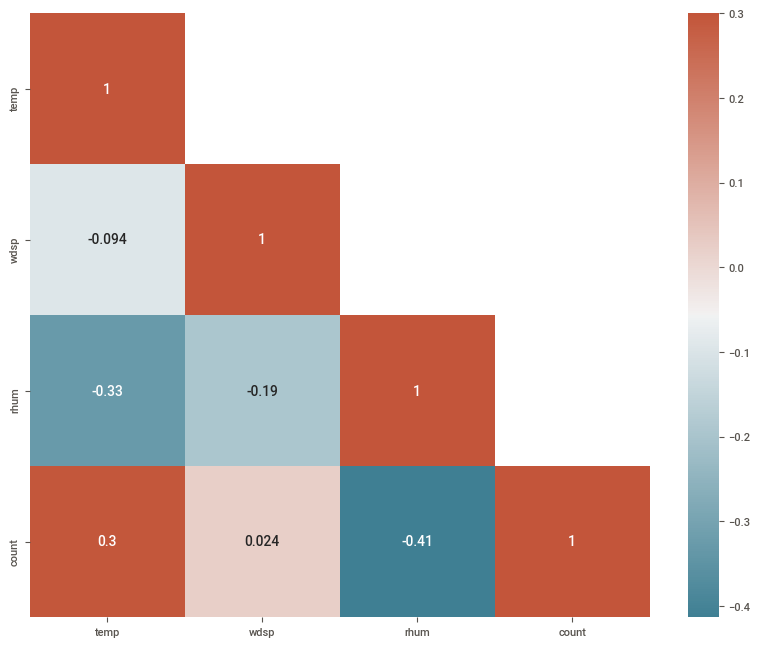

In [27]:
corrMatt = hourly_rentals[['temp','wdsp','rhum','count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrMatt, mask=mask,vmax=.3, annot=True, ax=ax, cmap=cmap)
plt.show()

## Relations between Numerical Features and Target variable

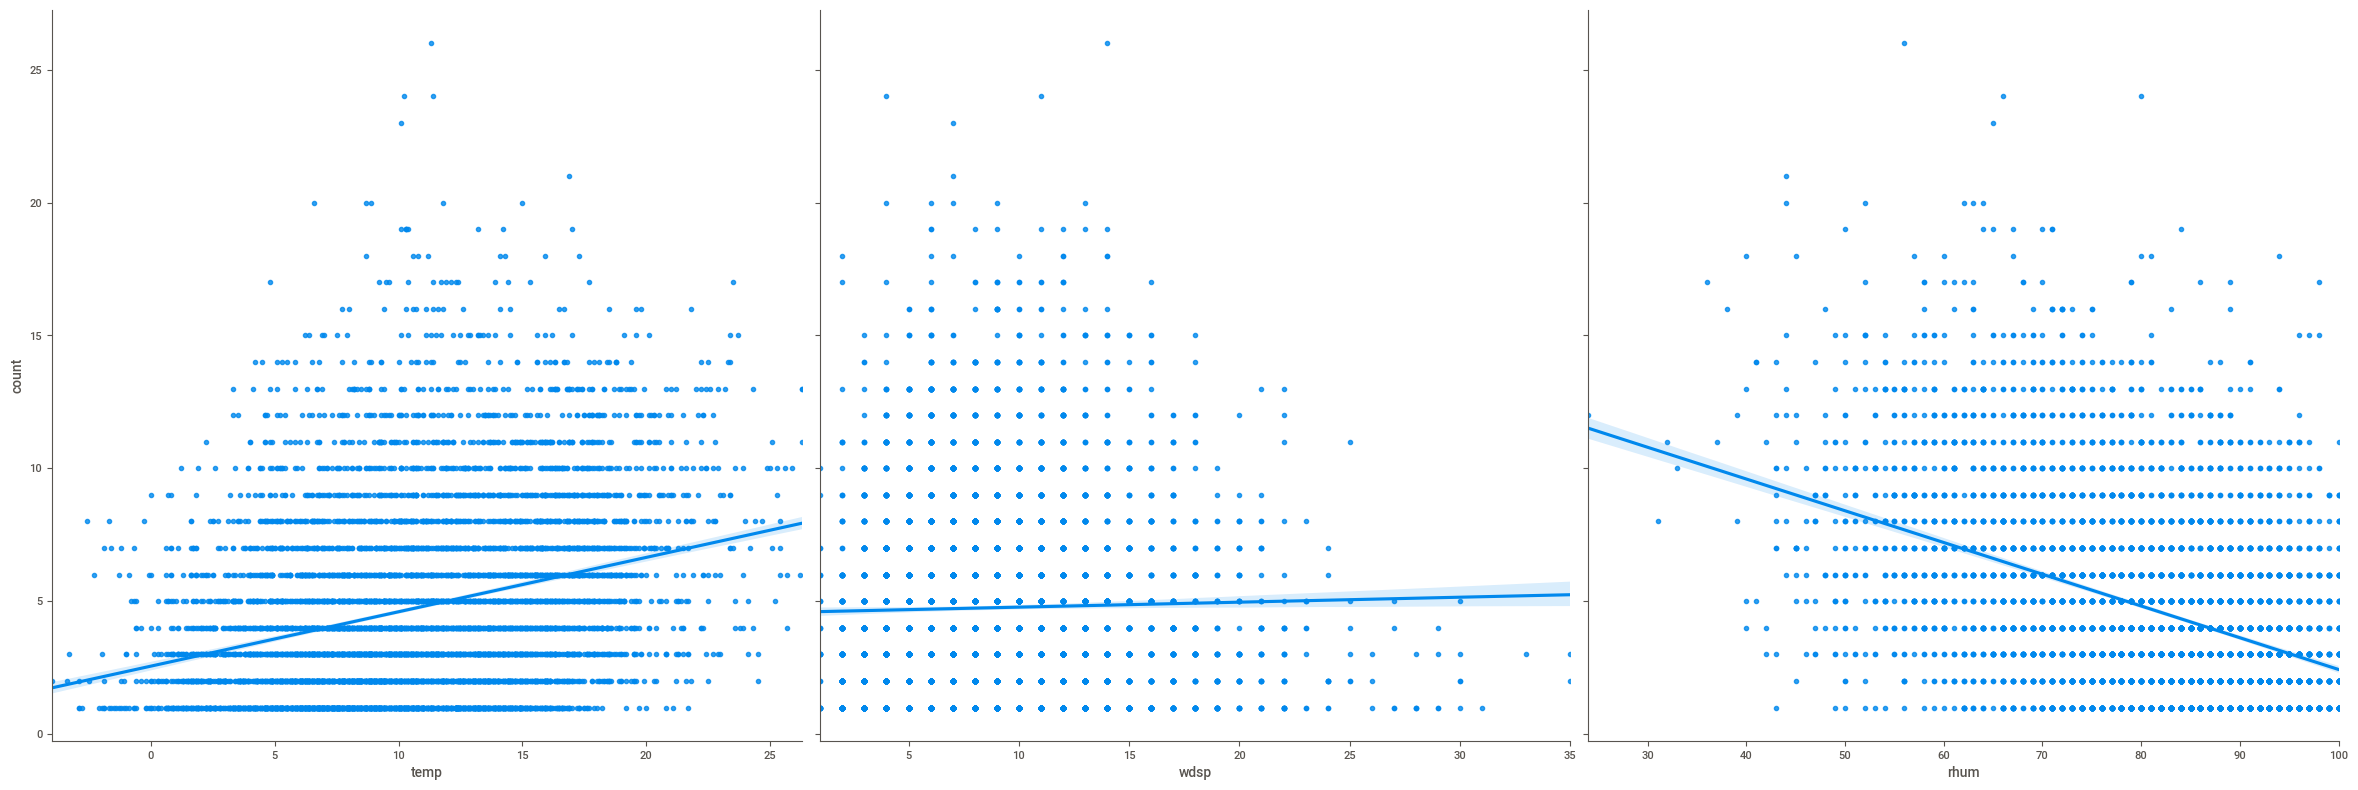

In [28]:
sns.pairplot(hourly_rentals, 
             x_vars=['temp','wdsp','rhum'],
             dropna=True, 
             y_vars='count', 
             height=8, 
             kind="reg", 
             palette='Set1')
plt.show()

Temperature and Relative Humidity show a strong correlation with Rentals Count (positive and negative, respectively) but Wind Speed does not seem to be correlated with Rentals Count. 

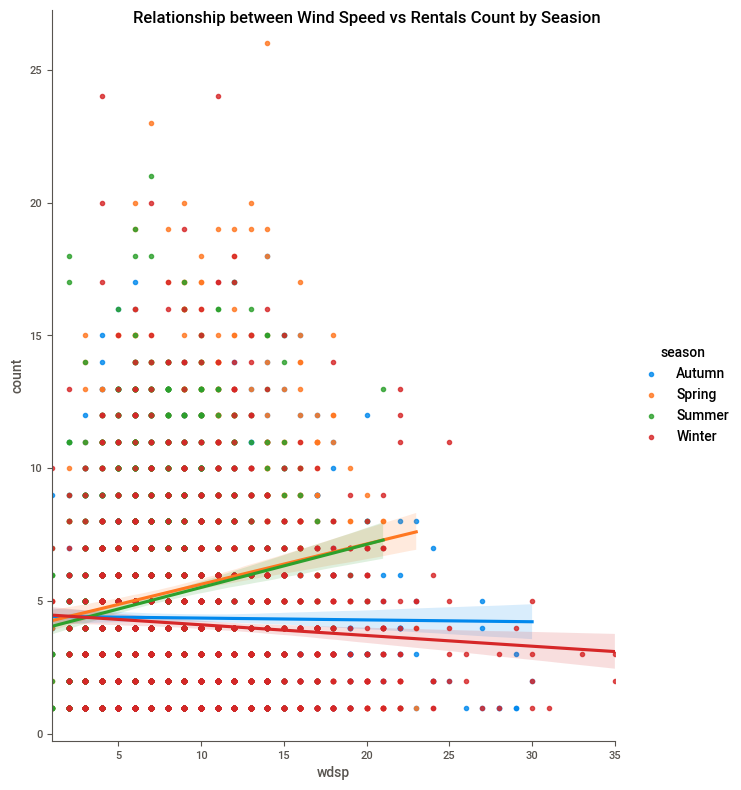

In [29]:
pp = sns.pairplot(hourly_rentals, 
             x_vars='wdsp',
             dropna=True, 
             y_vars='count', height=8, aspect=0.8, kind="reg", hue='season')
pp.fig.suptitle("Relationship between Wind Speed vs Rentals Count by Seasion")
plt.show()

If we plot the relationship by Season we can see that Wind Speed is correlated but depending on the Season is positive or negative. Which makes sense since on Autumn and Winter, as it is colder and temperature is normally low, Rentals decrease as the Wind Speed increases. In the Spring and Summer, because the temperature are on average higher the wind speed we see a different effect (positive correlation).



## Outlier Analysis

In [30]:
hourly_rentals['count'].describe()

count    6966.000000
mean        4.754378
std         3.442080
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        26.000000
Name: count, dtype: float64

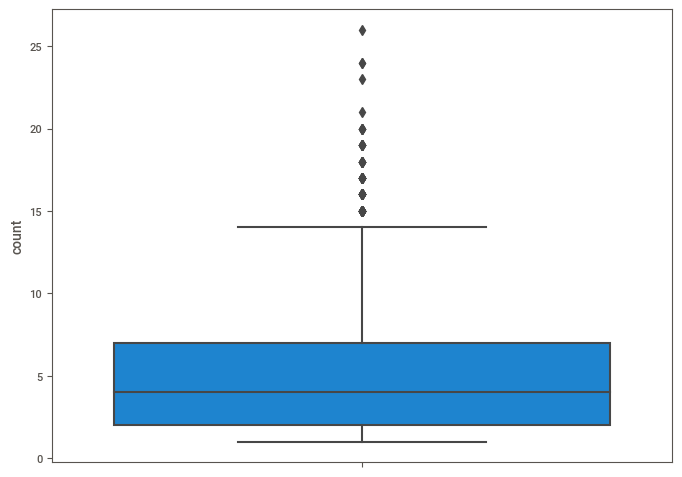

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=hourly_rentals,
            y="count",
            orient="v",ax=ax)
plt.show()

In [32]:
hourlyDataOutliers = hourly_rentals[hourly_rentals['count'] > 14]
hourlyDataWithoutOutliers = hourly_rentals[hourly_rentals['count'] <= 14]
    
print(f"Outliers (#): {round(hourlyDataOutliers.shape[0], 2)}")
print(f"Outliers (%): {round((hourlyDataOutliers.shape[0] / hourly_rentals.shape[0])*100, 2)}%")

Outliers (#): 93
Outliers (%): 1.34%


In [33]:
hourlyDataOutliers['holiday'].value_counts()

False    87
True      6
Name: holiday, dtype: int64

In [34]:
hourlyDataOutliers['working_day'].value_counts(normalize=True)

False    0.505376
True     0.494624
Name: working_day, dtype: float64

In [35]:
hourlyDataOutliers['season'].value_counts()

Spring    45
Winter    21
Summer    18
Autumn     9
Name: season, dtype: int64

In [36]:
daily_count = hourly_rentals.groupby('date')['count'].sum().reset_index()
daily_count_no_outliers = hourlyDataWithoutOutliers.groupby('date')['count'].sum().reset_index()

In [37]:
daily_count.describe()

count
count  364.000000
mean    90.986264
std     27.873234
min     14.000000
25%     73.000000
50%     90.000000
75%    111.000000
max    171.000000

In [38]:
print(f"Mean of daily rentals = {round(daily_count['count'].mean(), 2)}")
print(f"Mean of daily rentals without Outliers = {round(daily_count_no_outliers['count'].mean(), 2)}")

Mean of daily rentals = 90.99
Mean of daily rentals without Outliers = 86.67


In [39]:
hourlyDataOutliers = hourlyDataOutliers.join(daily_count.set_index('date'), on='date', lsuffix='_hour', rsuffix='_day')

In [40]:
outliers_df = hourlyDataOutliers[hourlyDataOutliers['count_day'] > 110].sort_values(by='count_day', ascending=False)
outliers_df.head()

date  hour  rain  temp  rhum  wdsp  day  month  year holiday  \
286  2021-03-17    11   0.0   8.7    81    12   17      3  2021    True   
287  2021-03-17    12   0.0  10.3    71     9   17      3  2021    True   
288  2021-03-17    13   0.0  11.4    66    11   17      3  2021    True   
289  2021-03-17    14   0.0  11.9    60    12   17      3  2021    True   
290  2021-03-17    15   0.0  12.8    49    10   17      3  2021    True   

     dayofweek_n  dayofweek working_day  season   peak timesofday rain_type  \
286            2  Wednesday       False  Winter  False    Morning   no rain   
287            2  Wednesday       False  Winter  False  Afternoon   no rain   
288            2  Wednesday       False  Winter  False  Afternoon   no rain   
289            2  Wednesday       False  Winter  False  Afternoon   no rain   
290            2  Wednesday       False  Winter  False  Afternoon   no rain   

     count_hour  count_day  
286          18        171  
287          19        171  
288          24        171  
289          17        171  
290          15        171

In [41]:
hourlyDataOutliers.to_csv('../data/interim/outliers.csv')

In [42]:
hourlyDataWithoutOutliers = hourly_rentals[np.abs(hourly_rentals["count"]-hourly_rentals["count"].mean())<=(2*hourly_rentals["count"].std())]
profile = ProfileReport(hourlyDataOutliers, title='Hourly Data without Outliers', html={'style':{'full_width':True}})
profile.to_file(output_file='../reports/pandas-profiling/hourlyDataWithoutOutliers.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Distribution of numerical features

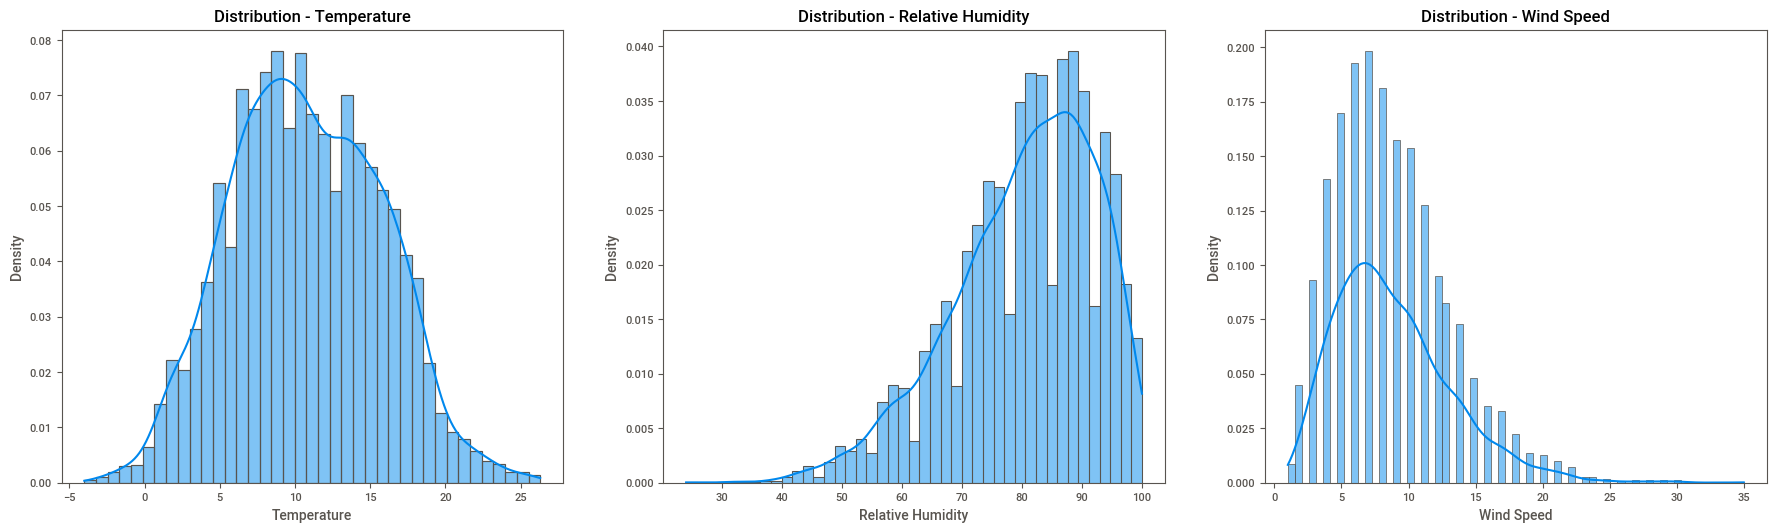

In [43]:
fig = plt.figure(figsize=(22,6))
gs = fig.add_gridspec(1, 3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

sns.histplot(hourly_rentals['temp'],ax=ax0, stat='density', kde=True)
sns.histplot(hourly_rentals['rhum'],ax=ax1, stat='density', kde=True)
sns.histplot(hourly_rentals['wdsp'],ax=ax2, stat='density', kde=True)

ax0.set(xlabel='Temperature',title="Distribution - Temperature")
ax1.set(xlabel='Relative Humidity',title="Distribution - Relative Humidity")
ax2.set(xlabel='Wind Speed',title="Distribution - Wind Speed")

plt.show()

<img title="GitHub Mark" src="./img/GitHub-Mark-64px.png" style="height: 32px; padding-right: 15px" alt="GitHub Mark" align="left"> [GitHub repository](https://github.com/pessini/moby-bikes) <br>Author: Leandro Pessini